## COMP5328 - Advanced Machine Learning

## Assignment 2: Advanced Machine Learning

------------------------------------------------------------------------
### Group 90; SID: 540033724; 540323234; 520370197; 500521681
------------------------------------------------------------------------

## 1. Load Dataset

### 1.1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Expectation-Maximization (EM)
from scipy.special import softmax

# CNN
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Remember to replace the $FILE PATH
cifar_data = np.load("/content/sample_data/CIFAR10.npz")
fashion_data_0_3 = np.load("/content/sample_data/FashionMNIST0.3.npz")
fashion_data_0_6 = np.load("/content/sample_data/FashionMNIST0.6.npz")

### 1.2. View dataset information

#### 1.2.1. CIFAR10 Dataset

In [ ]:
Xtr_cifar, Str_cifar, Xts_cifar, Yts_cifar = (
    cifar_data["X_tr"], cifar_data["S_tr"], cifar_data["X_ts"], cifar_data["Y_ts"]
)

In [ ]:
print("CIFAR10 - Training data shape:", Xtr_cifar.shape)
print("CIFAR10 - Training labels shape:", Str_cifar.shape)
print("CIFAR10 - Test data shape:", Xts_cifar.shape)
print("CIFAR10 - Test labels shape:", Yts_cifar.shape)

CIFAR10 - Training data shape: (20000, 32, 32, 3)
CIFAR10 - Training labels shape: (20000,)
CIFAR10 - Test data shape: (4000, 32, 32, 3)
CIFAR10 - Test labels shape: (4000,)


In [ ]:
# Number of classes in the CIFAR10 dataset
num_classes_train = len(np.unique(Str_cifar))
num_classes_test = len(np.unique(Yts_cifar))

print("CIFAR10 - Number of classes in training data:", num_classes_train)
print("CIFAR10 - Number of classes in test data:", num_classes_test)

# Unique classes in the training and test labels
print("Unique classes in training data:", np.unique(Str_cifar))
print("Unique classes in test data:", np.unique(Yts_cifar))

CIFAR10 - Number of classes in training data: 4
CIFAR10 - Number of classes in test data: 4
Unique classes in training data: [0 1 2 3]
Unique classes in test data: [0 1 2 3]


#### 1.2.2. FashionMINIST0.3 Dataset

In [ ]:
Xtr_fashion_0_3, Str_fashion_0_3, Xts_fashion_0_3, Yts_fashion_0_3 = (
    fashion_data_0_3["X_tr"], fashion_data_0_3["S_tr"], fashion_data_0_3["X_ts"], fashion_data_0_3["Y_ts"]
)

In [ ]:
print("FashionMINIST0.3 - Training data shape:", Xtr_fashion_0_3.shape)
print("FashionMINIST0.3 - Training labels shape:", Str_fashion_0_3.shape)
print("FashionMINIST0.3 - Test data shape:", Xts_fashion_0_3.shape)
print("FashionMINIST0.3 - Test labels shape:", Yts_fashion_0_3.shape)

FashionMINIST0.3 - Training data shape: (24000, 28, 28)
FashionMINIST0.3 - Training labels shape: (24000,)
FashionMINIST0.3 - Test data shape: (4000, 28, 28)
FashionMINIST0.3 - Test labels shape: (4000,)


#### 1.2.3. FashionMINIST0.6 Dataset

In [ ]:
Xtr_fashion_0_6, Str_fashion_0_6, Xts_fashion_0_6, Yts_fashion_0_6 = (
    fashion_data_0_6["X_tr"], fashion_data_0_6["S_tr"], fashion_data_0_6["X_ts"], fashion_data_0_6["Y_ts"]
)

In [ ]:
print("FashionMINIST0.6 - Training data shape:", Xtr_fashion_0_6.shape)
print("FashionMINIST0.6 - Training labels shape:", Str_fashion_0_6.shape)
print("FashionMINIST0.6 - Test data shape:", Xts_fashion_0_6.shape)
print("FashionMINIST0.6 - Test labels shape:", Yts_fashion_0_6.shape)

FashionMINIST0.6 - Training data shape: (24000, 28, 28)
FashionMINIST0.6 - Training labels shape: (24000,)
FashionMINIST0.6 - Test data shape: (4000, 28, 28)
FashionMINIST0.6 - Test labels shape: (4000,)


### Visualization

In [ ]:
def visualize_data(X, y, num_images, title):
  np.random.seed(5328)
  indices = np.random.choice(X.shape[0], num_images, replace = False)
  images = X[indices]
  labels = y[indices]

  plt.figure(figsize = (15, 3))
  plt.suptitle(title, fontsize = 14, y = 1.05)
  for i, (image, label) in enumerate(zip(images, labels)):
      plt.subplot(1, num_images, i + 1)
      plt.imshow(image)
      plt.title(f"Label: {label}", fontsize=10)
      plt.axis('off')
  plt.tight_layout()
  plt.show()

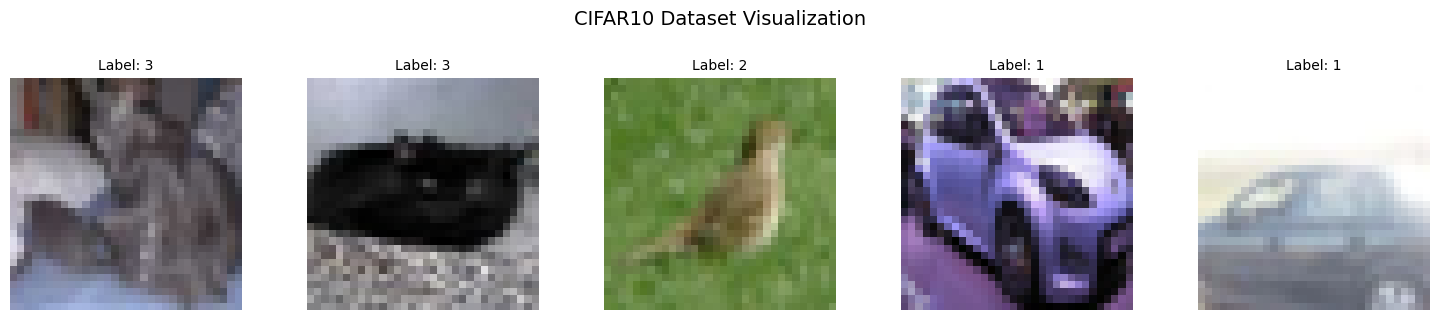

In [ ]:
# Visualize CIFAR10 datasets
visualize_data(Xtr_cifar, Str_cifar, 5, "CIFAR10 Dataset Visualization")

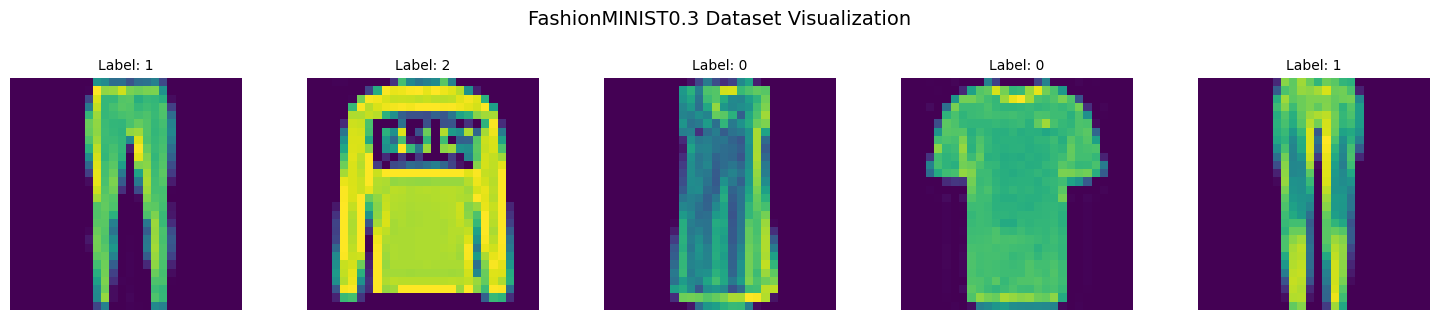

In [ ]:
# Visualize FashionMINIST0.3 datasets
visualize_data(Xtr_fashion_0_3, Str_fashion_0_3, 5, "FashionMINIST0.3 Dataset Visualization")

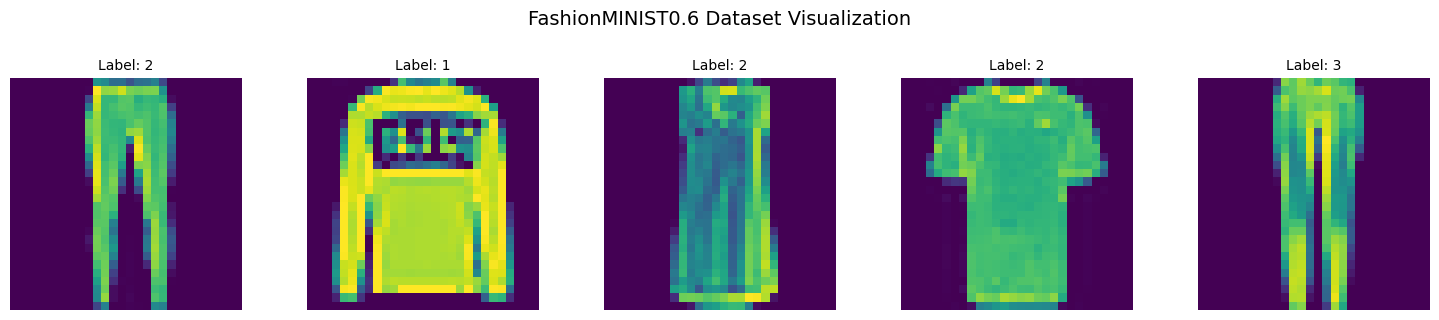

In [ ]:
# Visualize FashionMINIST0.6 datasets
visualize_data(Xtr_fashion_0_6, Str_fashion_0_6, 5, "FashionMINIST0.6 Dataset Visualization")

## 2. Data Splitting

Splitting 80% for training and 20% for validation

In [ ]:
# CIFAR10 Dataset Splitting
X_train_cifar, X_val_cifar, y_train_cifar, y_val_cifar = train_test_split(
    Xtr_cifar, Str_cifar, test_size = 0.2, random_state = 5328
)

# FashionMINIST0.3 Dataset Splitting
X_train_fashion_0_3, X_val_fashion_0_3, y_train_fashion_0_3, y_val_fashion_0_3 = train_test_split(
    Xtr_fashion_0_3, Str_fashion_0_3, test_size = 0.2, random_state = 5328
)

# FashionMINIST0.6 Dataset Splitting
X_train_fashion_0_6, X_val_fashion_0_6, y_train_fashion_0_6, y_val_fashion_0_6 = train_test_split(
    Xtr_fashion_0_6, Str_fashion_0_6, test_size = 0.2, random_state = 5328
)

## 3. Data Preprocessing

In [ ]:
X_train_cifar = X_train_cifar / 255
X_val_cifar = X_val_cifar / 255
Xts_cifar = Xts_cifar / 255

X_train_fashion_0_3 = X_train_fashion_0_3 / 255
X_val_fashion_0_3 = X_val_fashion_0_3 / 255
Xts_fashion_0_3 = Xts_fashion_0_3 / 255

X_train_fashion_0_6 = X_train_fashion_0_6 / 255
X_val_fashion_0_6 = X_val_fashion_0_6 / 255
Xts_fashion_0_6 = Xts_fashion_0_6 / 255

## 4. CNN Model

### 4.1. Build CNN model

In [ ]:
def build_cnn_model(input_shape, num_classes):
  optimizer_lr = 0.01
  dropout_rate = 0.5
  model = Sequential([
      Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation = 'relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dropout(dropout_rate),
      Dense(128, activation = 'relu'),
      Dropout(dropout_rate),
      Dense(num_classes, activation = 'softmax')
  ])

  model.compile(optimizer = Adam(learning_rate = optimizer_lr),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

### 4.2. Train CNN model

In [ ]:
# Train CIFAR CNN model
model_cifar = build_cnn_model((32, 32, 3), 4)
model_cifar.fit(X_train_cifar, y_train_cifar, epochs = 10, batch_size = 64, validation_data = (X_val_cifar, y_val_cifar))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.3245 - loss: 1.3801 - val_accuracy: 0.5305 - val_loss: 1.1174
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.4776 - loss: 1.1566 - val_accuracy: 0.5477 - val_loss: 1.0637
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.5035 - loss: 1.1396 - val_accuracy: 0.5817 - val_loss: 1.0265
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.5364 - loss: 1.0944 - val_accuracy: 0.5610 - val_loss: 1.0230
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.5445 - loss: 1.0891 - val_accuracy: 0.5822 - val_loss: 1.0138
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.5422 - loss: 1.0894 - val_accuracy: 0.5592 - val_loss: 1.0406
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.5360 - loss: 1.0764 - val_accuracy: 0.5780 - val_loss: 1.0306
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.5503 - loss: 1.0620 - 

In [ ]:
# Train FashionMINIST0.3 CNN model
model_fashion_0_3 = build_cnn_model((28, 28, 1), 4)
model_fashion_0_3.fit(X_train_fashion_0_3, y_train_fashion_0_3, epochs = 10, batch_size = 64, validation_data = (X_val_fashion_0_3, y_val_fashion_0_3))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.5400 - loss: 1.0096 - val_accuracy: 0.6358 - val_loss: 0.7907
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6212 - loss: 0.8276 - val_accuracy: 0.6646 - val_loss: 0.7492
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.6351 - loss: 0.8028 - val_accuracy: 0.6673 - val_loss: 0.7379
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.6378 - loss: 0.7905 - val_accuracy: 0.6694 - val_loss: 0.7351
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6334 - loss: 0.8060 - val_accuracy: 0.6675 - val_loss: 0.7352
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.6369 - loss: 0.7929 - val_accuracy: 0.6621 - val_loss: 0.7555
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6271 - loss: 0.7965 - val_accuracy: 0.6621 - val_loss: 0.7547
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.6424 - loss: 0.7886 - 

In [ ]:
# Train FashionMINIST0.6 CNN model
model_fashion_0_6 = build_cnn_model((28, 28, 1), 4)
model_fashion_0_6.fit(X_train_fashion_0_6, y_train_fashion_0_6, epochs = 10, batch_size = 64, validation_data = (X_val_fashion_0_6, y_val_fashion_0_6))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.2811 - loss: 1.4142 - val_accuracy: 0.3619 - val_loss: 1.3651
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.3263 - loss: 1.3711 - val_accuracy: 0.3575 - val_loss: 1.3641
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.3214 - loss: 1.3726 - val_accuracy: 0.3375 - val_loss: 1.3652
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.3320 - loss: 1.3700 - val_accuracy: 0.3502 - val_loss: 1.3664
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.3216 - loss: 1.3716 - val_accuracy: 0.3523 - val_loss: 1.3661
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3164 - loss: 1.3741 - val_accuracy: 0.3352 - val_loss: 1.3648
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.3260 - loss: 1.3709 - val_accuracy: 0.3604 - val_loss: 1.3667
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.3250 - loss: 1.3719 - 

##  5. Expectation-Maximization (EM) Algorithm

In [ ]:
def estimate_transition_matrix(model, X_data, y_data):
  num_classes = len(np.unique(y_data))
  num_iterations = 15

  # Initialize Transition Matrix
  np.random.seed(5328)
  T = np.random.dirichlet(np.ones(num_classes), size = num_classes)
  epsilon = 1e-12

  for iteration in range(num_iterations):
    # Step E
    temperature = 0.1
    pred_probs = model.predict(X_data)
    pred_probs = softmax(pred_probs / temperature, axis = 1)

    # Update noise probabilities using T
    noisy_probs = np.dot(pred_probs, T)
    noisy_probs = noisy_probs / (np.sum(noisy_probs, axis = 1, keepdims = True) + epsilon)

    # Step M
    for i in range(num_classes):
      for j in range(num_classes):
        mask = (y_data == j)
        if mask.sum() > 0:
          T[i, j] = noisy_probs[mask, i].mean() + np.random.normal(0, 0.01)

    # Normalize T
    T = (T / (np.sum(T, axis = 0, keepdims = True) + epsilon)) + np.random.normal(0, 0.001, T.shape)

  print("Estimated Transition Matrix T:\n", T)
  return T

Use the EM algorithm to estimate the migration matrix of CIFAR10

In [ ]:
T_cifar = estimate_transition_matrix(model_cifar, X_train_cifar, y_train_cifar)

500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
Estimated Transition Matrix T:
 [[0.24968872 0.24445017 0.2369663  0.24541515]
 [0.26609122 0.26708345 0.25177891 0.25289256]
 [0.21401954 0.24242867 0.24253829 0.26039793]
 [0.27001455 0.24465613 0.26604101 0.23965182]]


In [ ]:
def display_transition_matrix_as_dataframe(T_matrix, class_labels):
  df = pd.DataFrame(T_matrix, index = class_labels, columns = class_labels)
  return df

# 4 Categories
class_labels = [f"Class {i+1}" for i in range(4)]
display_transition_matrix_as_dataframe(T_cifar, class_labels)

,Class 1,Class 2,Class 3,Class 4
Class 1,0.249689,0.244450,0.236966,0.245415
Class 2,0.266091,0.267083,0.251779,0.252893
Class 3,0.214020,0.242429,0.242538,0.260398
Class 4,0.270015,0.244656,0.266041,0.239652


In [ ]:
# Transition Matrix T (FashionMNIST0.3)
T_fashion_0_3 = np.array([
    [0.7, 0.3, 0.0, 0.0],
    [0.0, 0.7, 0.3, 0.0],
    [0.0, 0.0, 0.7, 0.3],
    [0.3, 0.0, 0.0, 0.7]
])

# Transition Matrix T (FashionMNIST0.6)
T_fashion_0_6 = np.array([
    [0.4, 0.2, 0.2, 0.2],
    [0.2, 0.4, 0.2, 0.2],
    [0.2, 0.2, 0.4, 0.2],
    [0.2, 0.2, 0.2, 0.4]
])

In [ ]:
# Assuming conversion to 4x4
T_cifar_resized = T_cifar[:4, :4]

# Calculate the error with the known T of FashionMNIST0.3
error_0_3 = np.abs(T_fashion_0_3 - T_cifar_resized)
mean_error_0_3 = np.mean(error_0_3)

# Calculate the error with the known T of FashionMNIST0.6
error_0_6 = np.abs(T_fashion_0_6 - T_cifar_resized)
mean_error_0_6 = np.mean(error_0_6)

# Display
error_0_3_df = pd.DataFrame(error_0_3, columns=[f'Class {i+1}' for i in range(4)], index=[f'Class {i+1}' for i in range(4)])
error_0_6_df = pd.DataFrame(error_0_6, columns=[f'Class {i+1}' for i in range(4)], index=[f'Class {i+1}' for i in range(4)])

In [ ]:
print("Error matrix between estimated T and FashionMNIST0.3 T:")
display(error_0_3_df)

print("\nError matrix between estimated T and FashionMNIST0.6 T:")
display(error_0_6_df)

Error matrix between estimated T and FashionMNIST0.3 T:


,Class 1,Class 2,Class 3,Class 4
Class 1,0.450311,0.055550,0.236966,0.245415
Class 2,0.266091,0.432917,0.048221,0.252893
Class 3,0.214020,0.242429,0.457462,0.039602
Class 4,0.029985,0.244656,0.266041,0.460348



Error matrix between estimated T and FashionMNIST0.6 T:


,Class 1,Class 2,Class 3,Class 4
Class 1,0.150311,0.044450,0.036966,0.045415
Class 2,0.066091,0.132917,0.051779,0.052893
Class 3,0.014020,0.042429,0.157462,0.060398
Class 4,0.070015,0.044656,0.066041,0.160348


In [ ]:
mean_error_data = {
    'Dataset': ['FashionMNIST0.3', 'FashionMNIST0.6'],
    'Mean Error': [mean_error_0_3, mean_error_0_6]
}

mean_error_df = pd.DataFrame(mean_error_data)

# Mean Error DataFrame
mean_error_df

,Dataset,Mean Error
0,FashionMNIST0.3,0.246432
1,FashionMNIST0.6,0.074762


## 6. Loss Function

### 6.1.1. Reweighted Loss Function

In [ ]:
def importance_weighted_loss(T):
  T = tf.cast(T, tf.float32)

  def loss_fn(y_true, y_pred):
    # Get probabilities
    out_softmax = tf.nn.softmax(y_pred)

    # Convert to one-hot encoding
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth = y_pred.shape[-1])

    # Adjust predictions using transformation matrix
    noisy_probs = tf.linalg.matmul(out_softmax, T)

    # Calculate categorical cross entropy
    weighted_loss = tf.keras.losses.categorical_crossentropy(y_true_one_hot, noisy_probs)

    return tf.reduce_mean(weighted_loss)

  return loss_fn

### 6.1.2. Training Model with Importance Weighted Loss Function

In [ ]:
def train_importance_weighted_model(model, X_train, y_train, X_val, y_val, T, epochs, batch_size):
  # Create loss function
  loss_fn = importance_weighted_loss(T)

  # Compile model
  model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])
  model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_val, y_val))

### 6.2.1. Generalized Cross Entropy (GCE) Loss Function

In [ ]:
def generalized_cross_entropy(q):
  def loss_fn(y_true, y_pred):
    # Get probability
    y_pred_softmax = tf.nn.softmax(y_pred)

    # Convert to one-hot encoding
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])

    # Select probabilities of true labels
    pt = tf.reduce_sum(y_true_one_hot * y_pred_softmax, axis = -1)

    # Compute GCE
    gce_loss = (1 - pt**q) / q
    return tf.reduce_mean(gce_loss)

  return loss_fn

### 6.2.2. Training Model with GCE Loss Function

In [ ]:
def train_gce_loss_model(model, X_train, y_train, X_val, y_val, q, epochs, batch_size):
  # Create GCE Loss function
  loss_fn = generalized_cross_entropy(q)

  # Compile the model and use GCE Loss
  model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_val, y_val))

## 7. Model Evaluation

### 7.1. CIFAR10 Dataset Evaluation

In [ ]:
def top_1_accuracy(y_true, y_pred):
  y_pred_labels = np.argmax(y_pred, axis = 1)
  correct_predictions = np.sum(y_true == y_pred_labels)
  total_samples = y_true.shape[0]
  accuracy = correct_predictions / total_samples
  return accuracy

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, num_runs = 10, importance_weighted = False, gce = False, T = None):
  accuracies = []

  for i in range(num_runs):
    if importance_weighted:
      if T is None:
        raise ValueError("Missing Transition Matrix T")
      train_importance_weighted_model(model, X_train, y_train, X_val, y_val, T, 10, 64)
    elif gce:
      train_gce_loss_model(model, X_train, y_train, X_val, y_val, 0.7, 10, 64)
    else:
      model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
      model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_val, y_val))

    # Predict and calculate accuracy
    y_pred = model.predict(X_val)
    accuracy = top_1_accuracy(y_val, y_pred)
    accuracies.append(accuracy)

  return accuracies

In [ ]:
# Train and evaluate the baseline model (unweighted)
baseline_accuracies_cifar = evaluate_model(
    model_cifar,
    X_train_cifar,
    y_train_cifar,
    X_val_cifar,
    y_val_cifar,
    num_runs = 10,
    importance_weighted = False,
    gce = False
)
baseline_mean_acc_cifar = np.mean(baseline_accuracies_cifar)
baseline_std_acc_cifar = np.std(baseline_accuracies_cifar)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.5726 - loss: 1.0118 - val_accuracy: 0.5970 - val_loss: 0.9655
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.5794 - loss: 1.0027 - val_accuracy: 0.5980 - val_loss: 0.9656
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.5794 - loss: 1.0054 - val_accuracy: 0.6060 - val_loss: 0.9602
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.5851 - loss: 1.0014 - val_accuracy: 0.6077 - val_loss: 0.9500
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.5870 - loss: 1.0001 - val_accuracy: 0.6125 - val_loss: 0.9491
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.5963 - loss: 0.9885 - val_accuracy: 0.6035 - val_loss: 0.9553
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.5891 - loss: 0.9902 - val_accuracy: 0.6072 - val_loss: 0.9490
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.5877 - loss: 0.9980 - 

In [ ]:
# Train and evaluate the weighted model (using the estimated transfer matrix T_cifar)
importance_weighted_accuracies_cifar = evaluate_model(
    model_cifar,
    X_train_cifar,
    y_train_cifar,
    X_val_cifar,
    y_val_cifar,
    num_runs = 10,
    importance_weighted = True,
    gce = False,
    T = T_cifar
)
importance_weighted_mean_acc_cifar = np.mean(importance_weighted_accuracies_cifar)
importance_weighted_std_acc_cifar = np.std(importance_weighted_accuracies_cifar)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.5058 - loss: 1.3825 - val_accuracy: 0.3952 - val_loss: 1.3799
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.4077 - loss: 1.3800 - val_accuracy: 0.4038 - val_loss: 1.3794
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.4030 - loss: 1.3796 - val_accuracy: 0.4090 - val_loss: 1.3793
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.4112 - loss: 1.3799 - val_accuracy: 0.4035 - val_loss: 1.3793
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.4054 - loss: 1.3796 - val_accuracy: 0.4008 - val_loss: 1.3792
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.4030 - loss: 1.3795 - val_accuracy: 0.4087 - val_loss: 1.3791
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.4078 - loss: 1.3795 - val_accuracy: 0.4002 - val_loss: 1.3792
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.4017 - loss: 1.3795 - 

In [ ]:
gce_accuracies_cifar = evaluate_model(
    model_cifar,
    X_train_cifar,
    y_train_cifar,
    X_val_cifar,
    y_val_cifar,
    num_runs = 10,
    importance_weighted = False,
    gce = True
)
gce_mean_acc_cifar = np.mean(gce_accuracies_cifar)
gce_std_acc_cifar = np.std(gce_accuracies_cifar)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 105ms/step - accuracy: 0.3692 - loss: 0.8486 - val_accuracy: 0.3988 - val_loss: 0.8365
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.4016 - loss: 0.8351 - val_accuracy: 0.4017 - val_loss: 0.8348
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.4150 - loss: 0.8296 - val_accuracy: 0.4160 - val_loss: 0.8291
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.4139 - loss: 0.8301 - val_accuracy: 0.4045 - val_loss: 0.8340
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.4151 - loss: 0.8295 - val_accuracy: 0.4178 - val_loss: 0.8284
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.4162 - loss: 0.8289 - val_accuracy: 0.4080 - val_loss: 0.8323
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.4118 - loss: 0.8307 - val_accuracy: 0.4160 - val_loss: 0.8292
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.4220 - loss: 0.8262 -

In [ ]:
print(f"Model (Cross Entropy) - Mean Accuracy: {baseline_mean_acc_cifar:.2f}, Standard Deviation: {baseline_std_acc_cifar:.2f}")
print(f"Importance Weighted Model - Mean Accuracy: {importance_weighted_mean_acc_cifar:.2f}, Standard Deviation: {importance_weighted_std_acc_cifar:.2f}")
print(f"Model (GCE) - Mean Accuracy: {gce_mean_acc_cifar:.2f}, Standard Deviation: {gce_std_acc_cifar:.2f}")

Model (Cross Entropy) - Mean Accuracy: 0.63, Standard Deviation: 0.01
Importance Weighted Model - Mean Accuracy: 0.38, Standard Deviation: 0.01
Model (GCE) - Mean Accuracy: 0.54, Standard Deviation: 0.06


### 7.2. FashionMINIST0.3 Dataset Evaluation

In [ ]:
baseline_accuracies_fashion_0_3 = evaluate_model(
    model_fashion_0_3,
    X_train_fashion_0_3,
    y_train_fashion_0_3,
    X_val_fashion_0_3,
    y_val_fashion_0_3,
    num_runs = 10,
    importance_weighted = False,
    gce = False
)
baseline_mean_acc_fashion_0_3 = np.mean(baseline_accuracies_fashion_0_3)
baseline_std_acc_fashion_0_3 = np.std(baseline_accuracies_fashion_0_3)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.6532 - loss: 0.7709 - val_accuracy: 0.6715 - val_loss: 0.7206
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6609 - loss: 0.7467 - val_accuracy: 0.6696 - val_loss: 0.7173
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.6678 - loss: 0.7377 - val_accuracy: 0.6677 - val_loss: 0.7217
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.6676 - loss: 0.7331 - val_accuracy: 0.6708 - val_loss: 0.7175
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6649 - loss: 0.7333 - val_accuracy: 0.6727 - val_loss: 0.7153
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.6723 - loss: 0.7245 - val_accuracy: 0.6715 - val_loss: 0.7149
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6635 - loss: 0.7325 - val_accuracy: 0.6702 - val_loss: 0.7127
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.6678 - loss: 0.7278 - 

In [ ]:
importance_weighted_accuracies_fashion_0_3 = evaluate_model(
    model_fashion_0_3,
    X_train_fashion_0_3,
    y_train_fashion_0_3,
    X_val_fashion_0_3,
    y_val_fashion_0_3,
    num_runs = 10,
    importance_weighted = True,
    gce = False,
    T = T_fashion_0_3
)
importance_weighted_mean_acc_fashion_0_3 = np.mean(importance_weighted_accuracies_fashion_0_3)
importance_weighted_std_acc_fashion_0_3 = np.std(importance_weighted_accuracies_fashion_0_3)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.6719 - loss: 1.1214 - val_accuracy: 0.6746 - val_loss: 1.0900
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.6675 - loss: 1.0929 - val_accuracy: 0.6750 - val_loss: 1.0891
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.6731 - loss: 1.0904 - val_accuracy: 0.6754 - val_loss: 1.0884
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6743 - loss: 1.0900 - val_accuracy: 0.6735 - val_loss: 1.0890
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6727 - loss: 1.0896 - val_accuracy: 0.6733 - val_loss: 1.0891
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.6740 - loss: 1.0898 - val_accuracy: 0.6742 - val_loss: 1.0884
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.6711 - loss: 1.0899 - val_accuracy: 0.6765 - val_loss: 1.0878
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.6708 - loss: 1.0903 - 

In [ ]:
gce_accuracies_fashion_0_3 = evaluate_model(
    model_fashion_0_3,
    X_train_fashion_0_3,
    y_train_fashion_0_3,
    X_val_fashion_0_3,
    y_val_fashion_0_3,
    num_runs = 10,
    importance_weighted = False,
    gce = True
)
gce_mean_acc_fashion_0_3 = np.mean(gce_accuracies_fashion_0_3)
gce_std_acc_fashion_0_3 = np.std(gce_accuracies_fashion_0_3)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.6841 - loss: 0.7150 - val_accuracy: 0.6790 - val_loss: 0.7168
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.6801 - loss: 0.7167 - val_accuracy: 0.6787 - val_loss: 0.7171
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6805 - loss: 0.7164 - val_accuracy: 0.6767 - val_loss: 0.7177
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6850 - loss: 0.7149 - val_accuracy: 0.6781 - val_loss: 0.7173
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6760 - loss: 0.7183 - val_accuracy: 0.6781 - val_loss: 0.7174
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.6808 - loss: 0.7163 - val_accuracy: 0.6790 - val_loss: 0.7171
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.6749 - loss: 0.7190 - val_accuracy: 0.6767 - val_loss: 0.7178
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6805 - loss: 0.7165 - 

In [ ]:
print(f"FashionMNIST0.3 Model (Cross Entropy) - Mean Accuracy: {baseline_mean_acc_fashion_0_3:.2f}, Standard Deviation: {baseline_std_acc_fashion_0_3:.2f}")
print(f"FashionMNIST0.3 Importance Weighted Model - Mean Accuracy: {importance_weighted_mean_acc_fashion_0_3:.2f}, Standard Deviation: {importance_weighted_std_acc_fashion_0_3:.2f}")
print(f"FashionMNIST0.3 Model (GCE) - Mean Accuracy: {gce_mean_acc_fashion_0_3:.2f}, Standard Deviation: {gce_std_acc_fashion_0_3:.2f}")

FashionMNIST0.3 Model (Cross Entropy) - Mean Accuracy: 0.67, Standard Deviation: 0.00
FashionMNIST0.3 Importance Weighted Model - Mean Accuracy: 0.68, Standard Deviation: 0.00
FashionMNIST0.3 Model (GCE) - Mean Accuracy: 0.68, Standard Deviation: 0.00


### 7.3. FashionMINIST0.6 Dataset Evaluation

In [ ]:
baseline_accuracies_fashion_0_6 = evaluate_model(
    model_fashion_0_6,
    X_train_fashion_0_6,
    y_train_fashion_0_6,
    X_val_fashion_0_6,
    y_val_fashion_0_6,
    num_runs = 10
)
baseline_mean_acc_fashion_0_6 = np.mean(baseline_accuracies_fashion_0_6)
baseline_std_acc_fashion_0_6 = np.std(baseline_accuracies_fashion_0_6)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.3416 - loss: 1.3663 - val_accuracy: 0.3550 - val_loss: 1.3623
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.3409 - loss: 1.3644 - val_accuracy: 0.3521 - val_loss: 1.3620
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.3333 - loss: 1.3668 - val_accuracy: 0.3573 - val_loss: 1.3610
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.3415 - loss: 1.3620 - val_accuracy: 0.3540 - val_loss: 1.3622
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3313 - loss: 1.3662 - val_accuracy: 0.3517 - val_loss: 1.3613
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.3315 - loss: 1.3685 - val_accuracy: 0.3565 - val_loss: 1.3626
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.3353 - loss: 1.3648 - val_accuracy: 0.3560 - val_loss: 1.3594
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3412 - loss: 1.3626 - 

In [ ]:
importance_weighted_accuracies_fashion_0_6 = evaluate_model(
    model_fashion_0_6,
    X_train_fashion_0_6,
    y_train_fashion_0_6,
    X_val_fashion_0_6,
    y_val_fashion_0_6,
    num_runs = 10,
    importance_weighted = True,
    T = T_fashion_0_6
)
importance_weighted_mean_acc_fashion_0_6 = np.mean(importance_weighted_accuracies_fashion_0_6)
importance_weighted_std_acc_fashion_0_6 = np.std(importance_weighted_accuracies_fashion_0_6)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.3673 - loss: 1.3750 - val_accuracy: 0.3750 - val_loss: 1.3640
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.3709 - loss: 1.3650 - val_accuracy: 0.3744 - val_loss: 1.3633
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.3705 - loss: 1.3647 - val_accuracy: 0.3760 - val_loss: 1.3629
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.3740 - loss: 1.3633 - val_accuracy: 0.3746 - val_loss: 1.3628
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.3717 - loss: 1.3641 - val_accuracy: 0.3746 - val_loss: 1.3629
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.3722 - loss: 1.3639 - val_accuracy: 0.3762 - val_loss: 1.3628
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.3691 - loss: 1.3646 - val_accuracy: 0.3781 - val_loss: 1.3625
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.3686 - loss: 1.3645 - 

In [ ]:
gce_accuracies_fashion_0_6 = evaluate_model(
    model_fashion_0_6,
    X_train_fashion_0_6,
    y_train_fashion_0_6,
    X_val_fashion_0_6,
    y_val_fashion_0_6,
    num_runs = 10,
    gce = True
)
gce_mean_acc_fashion_0_6 = np.mean(gce_accuracies_fashion_0_6)
gce_std_acc_fashion_0_6 = np.std(gce_accuracies_fashion_0_6)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.3835 - loss: 0.8431 - val_accuracy: 0.3794 - val_loss: 0.8453
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.3818 - loss: 0.8436 - val_accuracy: 0.3802 - val_loss: 0.8447
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.3805 - loss: 0.8444 - val_accuracy: 0.3783 - val_loss: 0.8458
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.3794 - loss: 0.8447 - val_accuracy: 0.3762 - val_loss: 0.8462
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.3844 - loss: 0.8423 - val_accuracy: 0.3773 - val_loss: 0.8462
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.3811 - loss: 0.8441 - val_accuracy: 0.3769 - val_loss: 0.8459
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.3827 - loss: 0.8433 - val_accuracy: 0.3798 - val_loss: 0.8450
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.3825 - loss: 0.8433 - 

In [ ]:
print(f"FashionMNIST0.6 Model (Cross Entropy) - Mean Accuracy: {baseline_mean_acc_fashion_0_6:.2f}, Standard Deviation: {baseline_std_acc_fashion_0_6:.2f}")
print(f"FashionMNIST0.6 Importance Weighted Model - Mean Accuracy: {importance_weighted_mean_acc_fashion_0_6:.2f}, Standard Deviation: {importance_weighted_std_acc_fashion_0_6:.2f}")
print(f"FashionMNIST0.6 Model (GCE) - Mean Accuracy: {gce_mean_acc_fashion_0_6:.2f}, Standard Deviation: {gce_std_acc_fashion_0_6:.2f}")

FashionMNIST0.6 Model (Cross Entropy) - Mean Accuracy: 0.37, Standard Deviation: 0.01
FashionMNIST0.6 Importance Weighted Model - Mean Accuracy: 0.38, Standard Deviation: 0.00
FashionMNIST0.6 Model (GCE) - Mean Accuracy: 0.38, Standard Deviation: 0.00


In [ ]:
# Data for Each Dataset
evaluation_results = {
    'Dataset': [
        'CIFAR10 (Cross Entropy)', 'CIFAR10 (Weighted)', 'CIFAR10 (GCE)',
        'FashionMNIST0.3 (Cross Entropy)', 'FashionMNIST0.3 (Weighted)', 'FashionMNIST0.3 (GCE)',
        'FashionMNIST0.6 (Cross Entropy)', 'FashionMNIST0.6 (Weighted)', 'FashionMNIST0.6 (GCE)'
    ],
    'Mean Accuracy': [
        baseline_mean_acc_cifar, importance_weighted_mean_acc_cifar, gce_mean_acc_cifar,
        baseline_mean_acc_fashion_0_3, importance_weighted_mean_acc_fashion_0_3, gce_mean_acc_fashion_0_3,
        baseline_mean_acc_fashion_0_6, importance_weighted_mean_acc_fashion_0_6, gce_mean_acc_fashion_0_6
    ],
    'Standard Deviation': [
        baseline_std_acc_cifar, importance_weighted_std_acc_cifar, gce_std_acc_cifar,
        baseline_std_acc_fashion_0_3, importance_weighted_std_acc_fashion_0_3, gce_std_acc_fashion_0_3,
        baseline_std_acc_fashion_0_6, importance_weighted_std_acc_fashion_0_6, gce_std_acc_fashion_0_6
    ]
}

evaluation_results_df = pd.DataFrame(evaluation_results)

# Display
evaluation_results_df

,Dataset,Mean Accuracy,Standard Deviation
0,CIFAR10 (Cross Entropy),0.627125,0.008317
1,CIFAR10 (Weighted),0.376075,0.013741
2,CIFAR10 (GCE),0.539275,0.062634
3,FashionMNIST0.3 (Cross Entropy),0.674063,0.001579
4,FashionMNIST0.3 (Weighted),0.676917,0.000998
5,FashionMNIST0.3 (GCE),0.678854,0.000845
6,FashionMNIST0.6 (Cross Entropy),0.371854,0.005260
7,FashionMNIST0.6 (Weighted),0.375896,0.001672
8,FashionMNIST0.6 (GCE),0.378917,0.000998


### 8. Evaluation Visualization

### 8.1. Visualization of the CIFAR10 dataset

In [ ]:
# Set Seaborn Style
sns.set(style = "ticks")

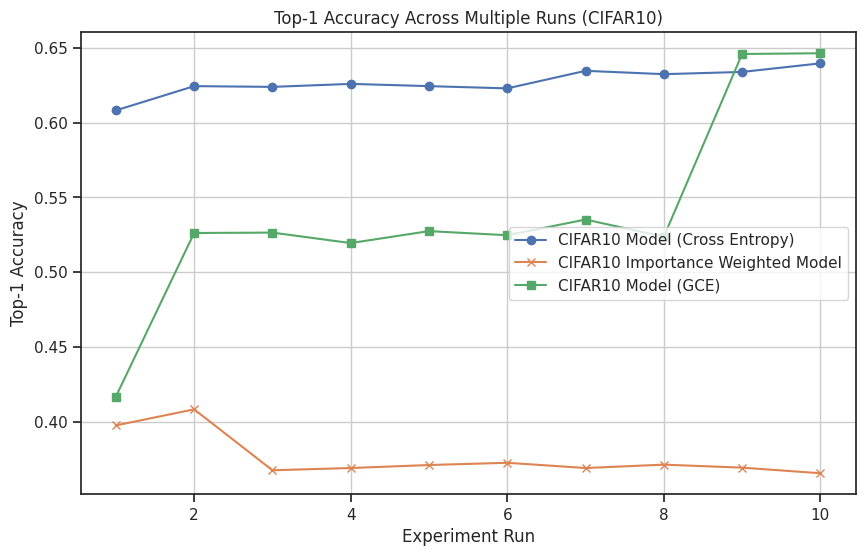

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(baseline_accuracies_cifar) + 1), baseline_accuracies_cifar, 'o-', label = 'CIFAR10 Model (Cross Entropy)')
plt.plot(range(1, len(importance_weighted_accuracies_cifar) + 1), importance_weighted_accuracies_cifar, 'x-', label = 'CIFAR10 Importance Weighted Model')
plt.plot(range(1, len(gce_accuracies_cifar) + 1), gce_accuracies_cifar, 's-', label = 'CIFAR10 Model (GCE)')

plt.xlabel('Experiment Run')
plt.ylabel('Top-1 Accuracy')
plt.title('Top-1 Accuracy Across Multiple Runs (CIFAR10)')
plt.legend()
plt.grid(True)
plt.show()

### 8.2. Visualization of the FashionMNIST0.3 Dataset

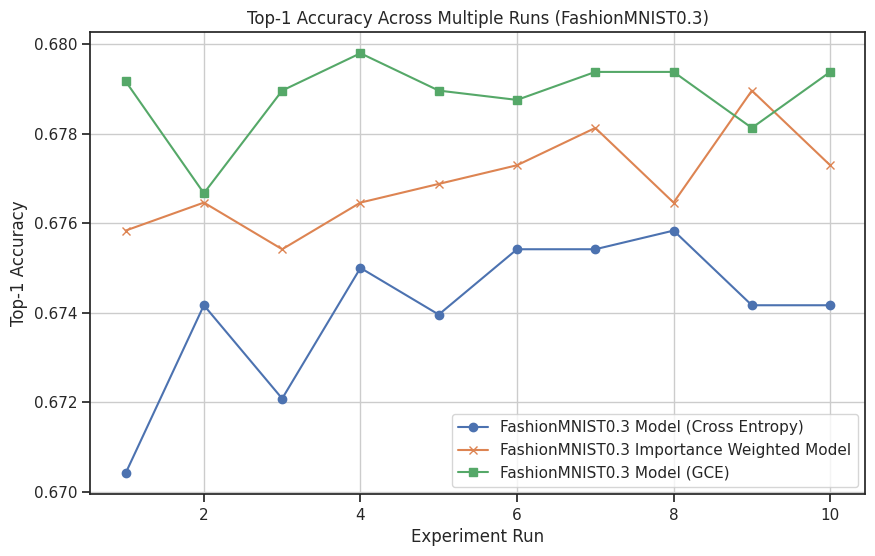

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(baseline_accuracies_fashion_0_3) + 1), baseline_accuracies_fashion_0_3, 'o-', label = 'FashionMNIST0.3 Model (Cross Entropy)')
plt.plot(range(1, len(importance_weighted_accuracies_fashion_0_3) + 1), importance_weighted_accuracies_fashion_0_3, 'x-', label = 'FashionMNIST0.3 Importance Weighted Model')
plt.plot(range(1, len(gce_accuracies_fashion_0_3) + 1), gce_accuracies_fashion_0_3, 's-', label = 'FashionMNIST0.3 Model (GCE)')

plt.xlabel('Experiment Run')
plt.ylabel('Top-1 Accuracy')
plt.title('Top-1 Accuracy Across Multiple Runs (FashionMNIST0.3)')
plt.legend()
plt.grid(True)
plt.show()

### 8.3. Visualization of the FashionMNIST0.6 Dataset

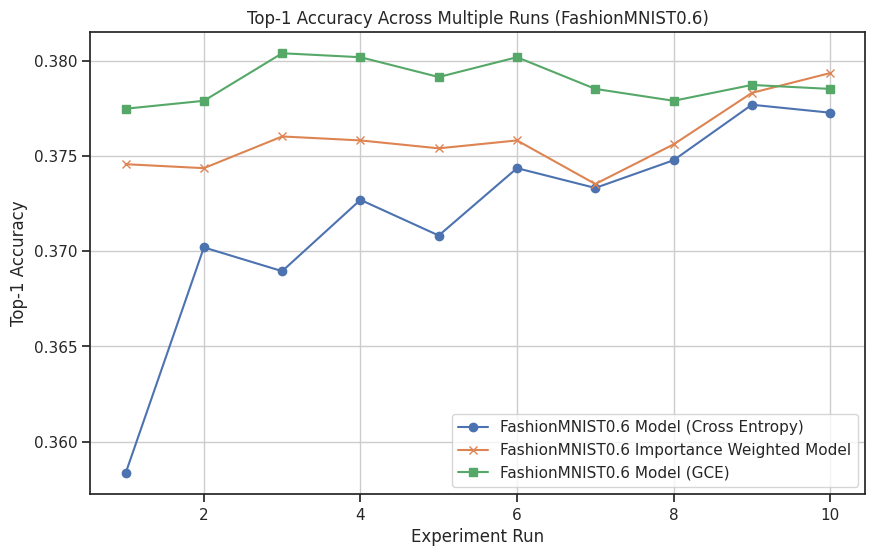

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(baseline_accuracies_fashion_0_6) + 1), baseline_accuracies_fashion_0_6, 'o-', label = 'FashionMNIST0.6 Model (Cross Entropy)')
plt.plot(range(1, len(importance_weighted_accuracies_fashion_0_6) + 1), importance_weighted_accuracies_fashion_0_6, 'x-', label = 'FashionMNIST0.6 Importance Weighted Model')
plt.plot(range(1, len(gce_accuracies_fashion_0_6) + 1), gce_accuracies_fashion_0_6, 's-', label = 'FashionMNIST0.6 Model (GCE)')

plt.xlabel('Experiment Run')
plt.ylabel('Top-1 Accuracy')
plt.title('Top-1 Accuracy Across Multiple Runs (FashionMNIST0.6)')
plt.legend()
plt.grid(True)
plt.show()

### 8.4. Line Chart - Top-1 Accuracy Trends for CIFAR10 and FashionMNIST

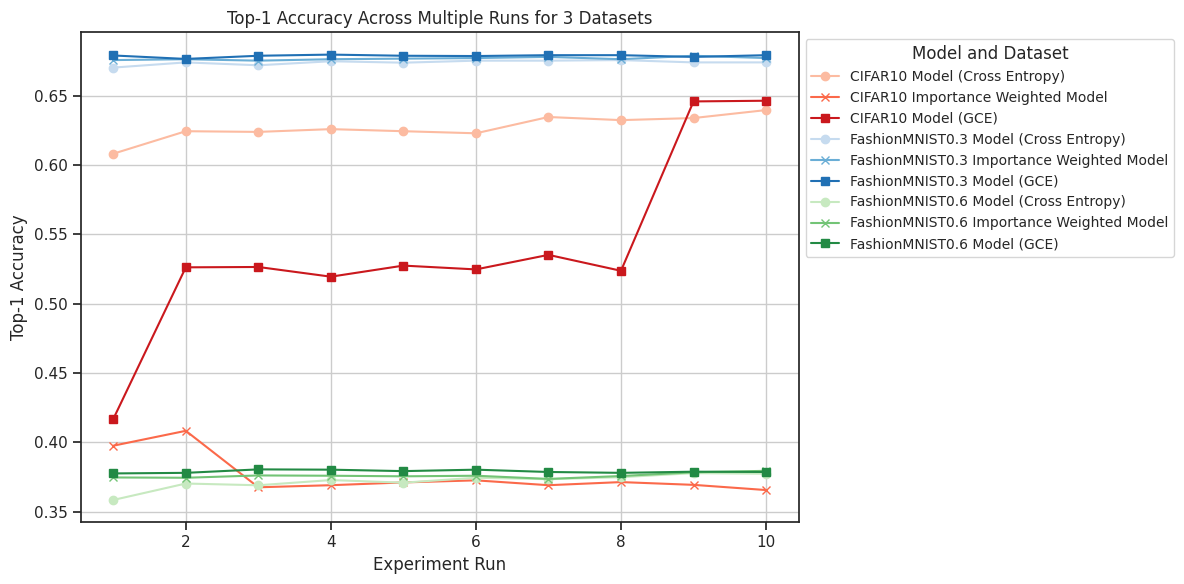

In [ ]:
plt.figure(figsize = (12, 6))

# Custom Colors
cifar_colors = sns.color_palette("Reds", 3)
fashion_0_3_colors = sns.color_palette("Blues", 3)
fashion_0_6_colors = sns.color_palette("Greens", 3)

# Visualization of the CIFAR10 dataset
plt.plot(range(1, len(baseline_accuracies_cifar) + 1), baseline_accuracies_cifar, 'o-',
         label = 'CIFAR10 Model (Cross Entropy)', color = cifar_colors[0])
plt.plot(range(1, len(importance_weighted_accuracies_cifar) + 1), importance_weighted_accuracies_cifar, 'x-',
         label = 'CIFAR10 Importance Weighted Model', color = cifar_colors[1])
plt.plot(range(1, len(gce_accuracies_cifar) + 1), gce_accuracies_cifar, 's-',
         label = 'CIFAR10 Model (GCE)', color = cifar_colors[2])

# Visualization of the FashionMNIST0.3 dataset
plt.plot(range(1, len(baseline_accuracies_fashion_0_3) + 1), baseline_accuracies_fashion_0_3, 'o-',
         label = 'FashionMNIST0.3 Model (Cross Entropy)', color = fashion_0_3_colors[0])
plt.plot(range(1, len(importance_weighted_accuracies_fashion_0_3) + 1), importance_weighted_accuracies_fashion_0_3, 'x-',
         label = 'FashionMNIST0.3 Importance Weighted Model', color = fashion_0_3_colors[1])
plt.plot(range(1, len(gce_accuracies_fashion_0_3) + 1), gce_accuracies_fashion_0_3, 's-',
         label = 'FashionMNIST0.3 Model (GCE)', color = fashion_0_3_colors[2])

# Visualization of the FashionMNIST0.6 dataset
plt.plot(range(1, len(baseline_accuracies_fashion_0_6) + 1), baseline_accuracies_fashion_0_6, 'o-',
         label = 'FashionMNIST0.6 Model (Cross Entropy)', color = fashion_0_6_colors[0])
plt.plot(range(1, len(importance_weighted_accuracies_fashion_0_6) + 1), importance_weighted_accuracies_fashion_0_6, 'x-',
         label = 'FashionMNIST0.6 Importance Weighted Model', color = fashion_0_6_colors[1])
plt.plot(range(1, len(gce_accuracies_fashion_0_6) + 1), gce_accuracies_fashion_0_6, 's-',
         label = 'FashionMNIST0.6 Model (GCE)', color = fashion_0_6_colors[2])

# Labeling
plt.xlabel('Experiment Run')
plt.ylabel('Top-1 Accuracy')
plt.title('Top-1 Accuracy Across Multiple Runs for 3 Datasets')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), fontsize = 'small', title = "Model and Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

### 8.5. Bar Chart - Top-1 Accuracy and Std for Models

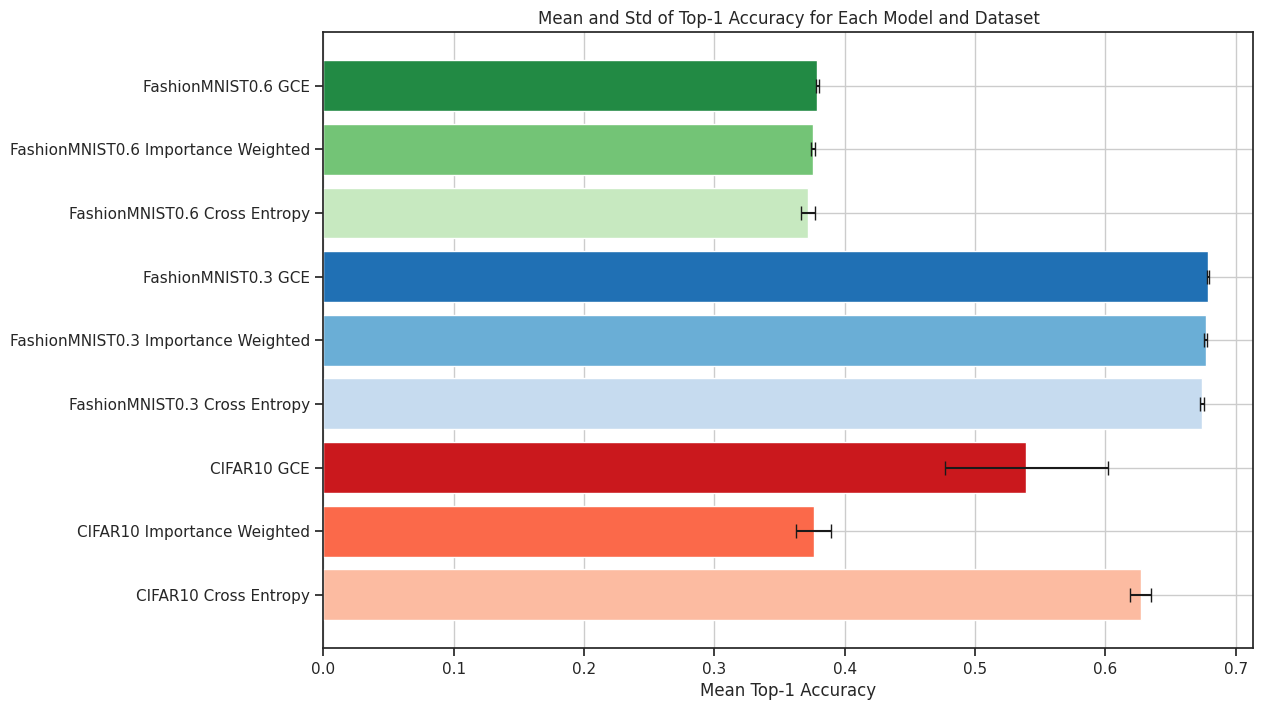

In [ ]:
mean_accuracies = [baseline_mean_acc_cifar, importance_weighted_mean_acc_cifar, gce_mean_acc_cifar,
                   baseline_mean_acc_fashion_0_3, importance_weighted_mean_acc_fashion_0_3, gce_mean_acc_fashion_0_3,
                   baseline_mean_acc_fashion_0_6, importance_weighted_mean_acc_fashion_0_6, gce_mean_acc_fashion_0_6]
std_accuracies = [baseline_std_acc_cifar, importance_weighted_std_acc_cifar, gce_std_acc_cifar,
                  baseline_std_acc_fashion_0_3, importance_weighted_std_acc_fashion_0_3, gce_std_acc_fashion_0_3,
                  baseline_std_acc_fashion_0_6, importance_weighted_std_acc_fashion_0_6, gce_std_acc_fashion_0_6]
labels = [
    'CIFAR10 Cross Entropy', 'CIFAR10 Importance Weighted', 'CIFAR10 GCE',
    'FashionMNIST0.3 Cross Entropy', 'FashionMNIST0.3 Importance Weighted', 'FashionMNIST0.3 GCE',
    'FashionMNIST0.6 Cross Entropy', 'FashionMNIST0.6 Importance Weighted', 'FashionMNIST0.6 GCE'
]

# Define Colors
cifar_colors = sns.color_palette("Reds", 3)
fashion_0_3_colors = sns.color_palette("Blues", 3)
fashion_0_6_colors = sns.color_palette("Greens", 3)

# Combine All Colors
colors = cifar_colors + fashion_0_3_colors + fashion_0_6_colors

# Plot the Bar Chart
plt.figure(figsize = (12, 8))
for i in range(len(mean_accuracies)):
  plt.barh(labels[i], mean_accuracies[i], xerr = std_accuracies[i], color = colors[i], capsize = 5)
plt.xlabel('Mean Top-1 Accuracy')
plt.title('Mean and Std of Top-1 Accuracy for Each Model and Dataset')
plt.grid(True)
plt.show()

### 8.6. Heatmap - Mean Accuracy Across Models

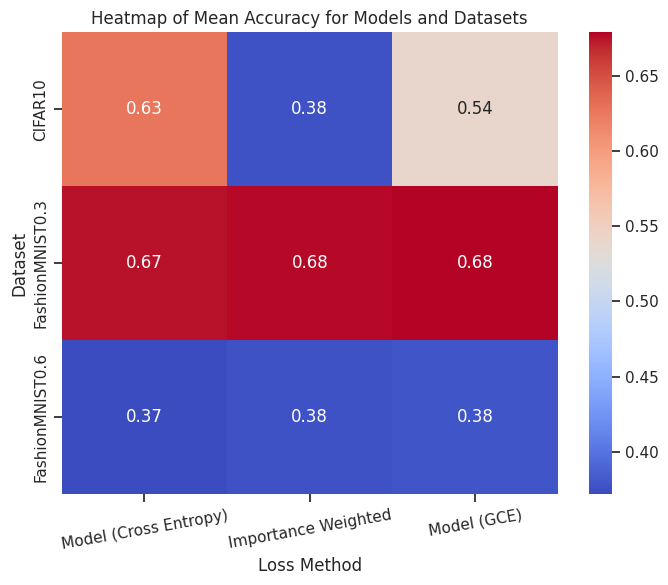

In [ ]:
accuracy_matrix = [
    [baseline_mean_acc_cifar, importance_weighted_mean_acc_cifar, gce_mean_acc_cifar],
    [baseline_mean_acc_fashion_0_3, importance_weighted_mean_acc_fashion_0_3, gce_mean_acc_fashion_0_3],
    [baseline_mean_acc_fashion_0_6, importance_weighted_mean_acc_fashion_0_6, gce_mean_acc_fashion_0_6]
]
plt.figure(figsize = (8, 6))
sns.heatmap(accuracy_matrix, annot = True, cmap = "coolwarm", fmt = ".2f",
            xticklabels = ["Model (Cross Entropy)", "Importance Weighted", "Model (GCE)"],
            yticklabels = ["CIFAR10", "FashionMNIST0.3", "FashionMNIST0.6"])
plt.xticks(rotation = 10)
plt.xlabel('Loss Method')
plt.ylabel('Dataset')
plt.title('Heatmap of Mean Accuracy for Models and Datasets')
plt.show()